## CHARTING CRYPTO: BITCOIN PRICE PREDICTION USING MACHINE LEARNING

#### - Manasa  P (21WU0101055)

In [ ]:
## IMPLEMENTATION CONTINUED :

In [5]:
# fetching raw price data (dictionary)
raw_price_data = \
    cryptocompare.get_historical_price_hour(
        ticker_symbol,
        currency,
        limit=limit_value,
        exchange=exchange_name,
        toTs=data_before_timestamp
    )

hour_price_data = pd.DataFrame.from_dict(raw_price_data)



# setting time columns as index and converting it to datetime
hour_price_data.set_index("time", inplace=True)
hour_price_data.index = pd.to_datetime(hour_price_data.index, unit='s')
hour_price_data['datetimes'] = hour_price_data.index
hour_price_data['datetimes'] = hour_price_data['datetimes'].dt.strftime(
    '%Y-%m-%d')


hour_price_data.iloc[:, :6].apply(lambda x: x.value_counts().index[0]).reset_index(name='val')

,index,val
0,high,27420.47
1,low,24585.31
2,open,28041.52
3,volumefrom,996.75
4,volumeto,11056684.03
5,close,23264.65


In [10]:
hour_price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2001 entries, 2023-02-06 10:00:00 to 2023-04-30 18:00:00
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   high              2001 non-null   float64
 1   low               2001 non-null   float64
 2   open              2001 non-null   float64
 3   volumefrom        2001 non-null   float64
 4   volumeto          2001 non-null   float64
 5   close             2001 non-null   float64
 6   conversionType    2001 non-null   object 
 7   conversionSymbol  2001 non-null   object 
 8   datetimes         2001 non-null   object 
dtypes: float64(6), object(3)
memory usage: 156.3+ KB


In [77]:
validation_percent = 0.2
test_percent = 0.2

# indices for splitting the data
num_samples = len(data)
num_validation = int(num_samples * validation_percent)
num_test = int(num_samples * test_percent)
num_train = num_samples - num_validation - num_test

# splitting the data
train_data = data.iloc[:num_train]
validation_data = data.iloc[num_train:num_train + num_validation]
test_data = data.iloc[num_train + num_validation:]



print(f'Training data points: {len(train_data)}')
print(f'Validation data points: {len(validation_data)}')
print(f'Test data points: {len(test_data)}')


Training data points: 934
Validation data points: 311
Test data points: 311


In [26]:
# LINEAR REGRESSION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.DataFrame.from_dict(data)

# Convert the 'Date' column to a datetime object
data['datetimes'] = pd.to_datetime(data['datetimes'])

# Extract the 'Close' price for modeling
price_data = data[['close']]

# Create a lag feature to use as a predictor
lag = 1  # You can adjust this to use a different lag
price_data['Close_Lagged'] = price_data['close'].shift(lag)

# Drop rows with missing data resulting from the lag
price_data.dropna(inplace=True)

# Split the data into training and testing sets
X = price_data['Close_Lagged'].values.reshape(-1, 1)
y = price_data['close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Visualize the actual vs. predicted Bitcoin prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data['Date'][-len(y_test):], y_pred, label='Predicted Prices', color='red')
plt.title('Bitcoin Price Prediction using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


C:\Users\manas\AppData\Local\Temp\ipykernel_26708\3651427110.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['Close_Lagged'] = price_data['close'].shift(lag)
C:\Users\manas\AppData\Local\Temp\ipykernel_26708\3651427110.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data.dropna(inplace=True)


Mean Squared Error (MSE): 22276.953449950637
Root Mean Squared Error (RMSE): 149.25465972608907
Mean Absolute Error (MAE): 91.83231530500753
R-squared (R2): 0.9975504278268557


KeyError: 'Date'

<Figure size 1200x600 with 0 Axes>

In [29]:
# identify influential features using linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.DataFrame.from_dict(data)

# Feature selection: Choose relevant features that may affect Bitcoin prices

# Split the data into features (X) and target (y)
X = data[['high', 'low']]  # Include relevant features
y = data['close']  # Target variable (Bitcoin prices)

# Build a linear regression model to identify influential features
model = LinearRegression()
model.fit(X, y)

# View the feature coefficients to identify the most influential factors
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Select the top N influential features
top_features = feature_importance['Feature'][:2].tolist()


In [30]:
# data preprocessing and splitting

import numpy as np
from sklearn.model_selection import train_test_split

# Select the top N influential features
X_selected = data[top_features]

# Convert the data to NumPy arrays
X = X_selected.values
y = data['close'].values

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [31]:
# build adaboost model

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Build an AdaBoost model
base_model = DecisionTreeRegressor(max_depth=3)  # You can adjust the tree depth
adaboost_model = AdaBoostRegressor(base_model, n_estimators=100)  # You can adjust the number of estimators

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=100)

In [32]:
# build lstm model

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define your LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid_lstm = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the LSTM model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
22/22 [==============================] - 7s 9ms/step - loss: 679891072.0000
Epoch 2/50
22/22 [==============================] - 0s 9ms/step - loss: 679825536.0000
Epoch 3/50
22/22 [==============================] - 0s 9ms/step - loss: 679703232.0000
Epoch 4/50
22/22 [==============================] - 0s 9ms/step - loss: 679530816.0000
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 679370816.0000
Epoch 6/50
22/22 [==============================] - 0s 9ms/step - loss: 679246976.0000
Epoch 7/50
22/22 [==============================] - 0s 10ms/step - loss: 679147968.0000
Epoch 8/50
22/22 [==============================] - 0s 9ms/step - loss: 679061504.0000
Epoch 9/50
22/22 [==============================] - 0s 9ms/step - loss: 678982144.0000
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 678907520.0000
Epoch 11/50
22/22 [==============================] - 0s 9ms/step - loss: 678835712.0000
Epoch 12/50
22/22 [=====================

In [33]:
# combine models for predictions

# Make predictions using the AdaBoost model
adaboost_predictions = adaboost_model.predict(X_valid)

# Make predictions using the LSTM model
lstm_predictions = model.predict(X_valid_lstm).flatten()

# Combine the predictions (you can adjust the combination method)
combined_predictions = (adaboost_predictions + lstm_predictions) / 2.0


10/10 [==============================] - 1s 4ms/step


Mean Squared Error (MSE): 170201686.9766126
Root Mean Squared Error (RMSE): 13046.136860259156
Mean Absolute Error (MAE): 12957.88739943844
R-squared (R2): -17.787242072175584


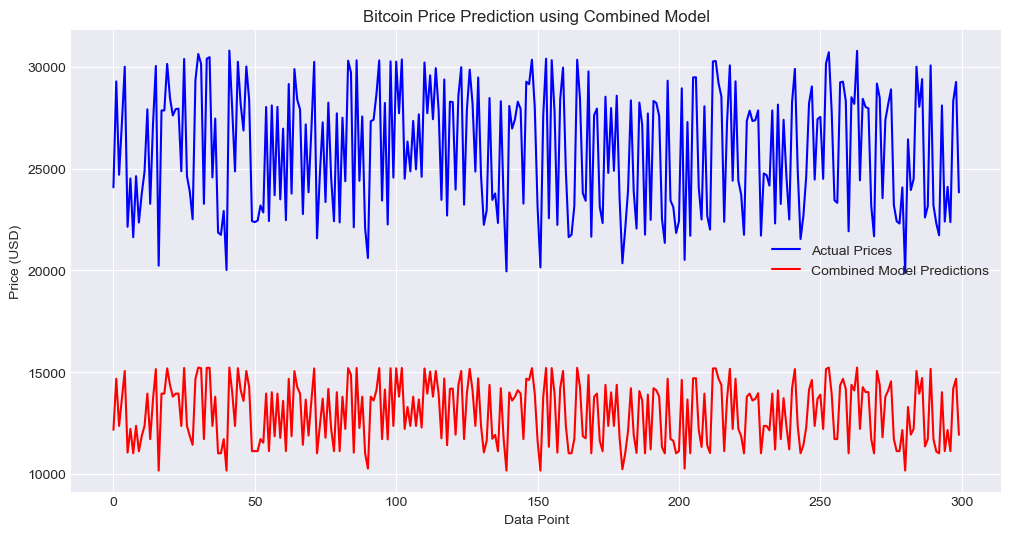

In [34]:
# evaluate combined model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Calculate evaluation metrics for the combined model
mse = mean_squared_error(y_valid, combined_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_valid, combined_predictions)
r2 = r2_score(y_valid, combined_predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Visualize the actual vs. combined model predictions
plt.figure(figsize=(12, 6))
plt.plot(y_valid, label='Actual Prices', color='blue')
plt.plot(combined_predictions, label='Combined Model Predictions', color='red')
plt.title('Bitcoin Price Prediction using Combined Model')
plt.xlabel('Data Point')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
